# Importing all necessary library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pandas.api.types import is_numeric_dtype

Loading the data set


In [18]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.describe().sum()

SeniorCitizen     7044.531031
tenure            7264.930096
MonthlyCharges    7470.551740
dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype('int')

# Handling null value

In [23]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## as we can see there is no null value.we can remove the customerId we don't need it

In [24]:
df = df.drop('customerID', axis=1)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes


# Encoding and scalling data

In [27]:
le = LabelEncoder()
min_max = MinMaxScaler()

In [28]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        df[col] = min_max.fit_transform(df[[col]])
    else:
        df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.11,2505,0
1,1,0.0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.38,1466,0
2,1,0.0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.35,157,1
3,1,0.0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.24,1400,0
4,0,0.0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.52,925,1


# Visualization

<Axes: >

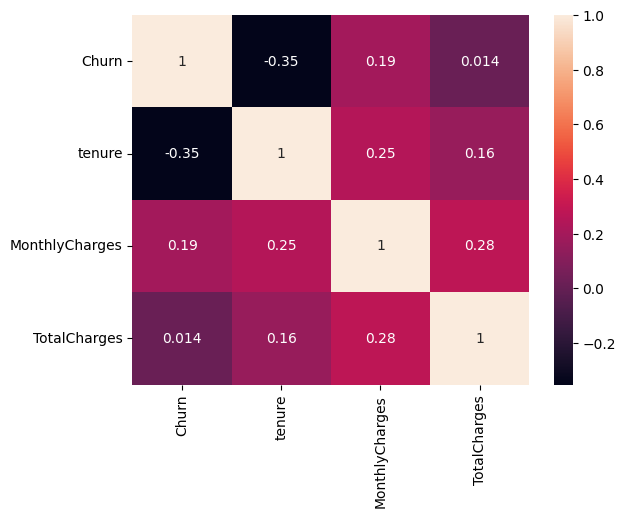

In [30]:
corr = df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True )

<BarContainer object of 7043 artists>

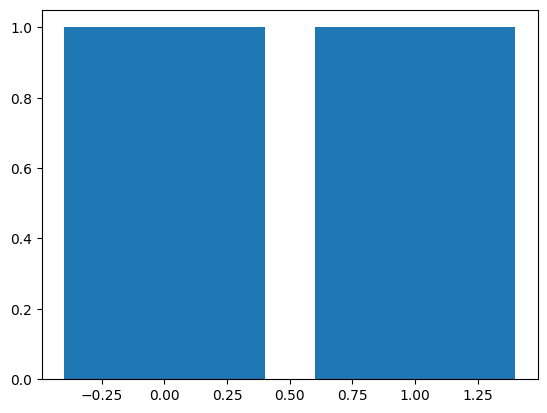

In [31]:
plt.bar(df['Churn'], df['tenure'])

<BarContainer object of 7043 artists>

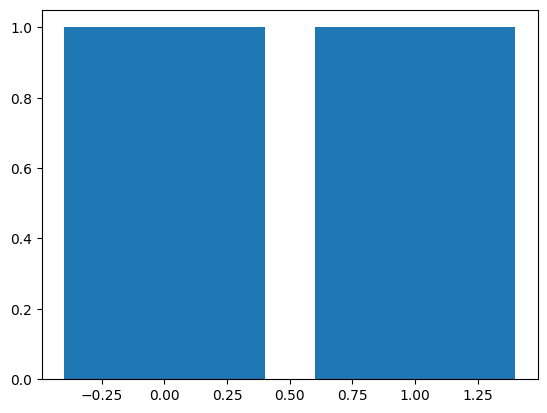

In [32]:
plt.bar(df['Churn'], df['MonthlyCharges'])

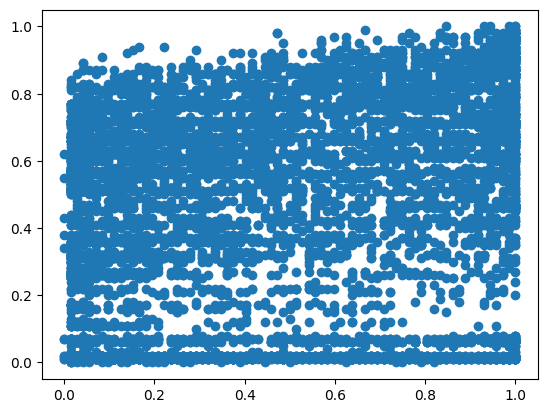

In [33]:
plt.scatter(df['tenure'], df['MonthlyCharges'])

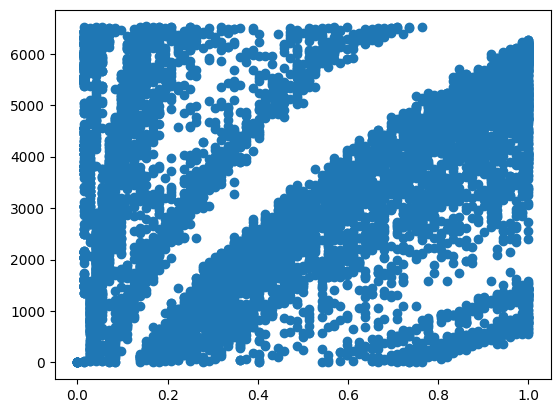

In [34]:
plt.scatter(df['tenure'], df['TotalCharges'])

form the visualization we can see monthly charges and churn has 0.19 corrilation

let's split output and input column

In [35]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [38]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.11,2505
1,1,0.0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.38,1466
2,1,0.0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.35,157
3,1,0.0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.24,1400
4,0,0.0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.52,925


In [39]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [40]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

as we can see our output column is not equal so we need to balance it

In [41]:
smote = SMOTE()

In [42]:
new_x, new_y = smote.fit_resample(X, y)

In [43]:
new_x.value_counts()


gender  SeniorCitizen  Partner  Dependents  tenure    PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0       0.0            0        0           0.013889  1             0              2                1               1             1                 1            1            1                0         0                 3              0.02            1616            12
1       0.0            0        0           0.013889  1             0              2                1               1             1                 1            1            1                0         0                 3              0.02            1610             8
                                                                                                                                                                                                       

In [44]:
new_y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Split the data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=42)

# Model train

In [55]:
log = LogisticRegression()

In [47]:
model = log.fit(x_train, y_train)

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for train score

In [48]:
model.score(x_train, y_train)

0.7966900217443827

for test score

In [49]:
model.score(x_test, y_test)

0.8091787439613527

In [50]:
pred = model.predict(x_test)

# Evaluation

In [51]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.75      0.80      1021
           1       0.78      0.86      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



In [52]:
cm = confusion_matrix(y_test, pred)
cm

array([[770, 251],
       [144, 905]])

<Axes: >

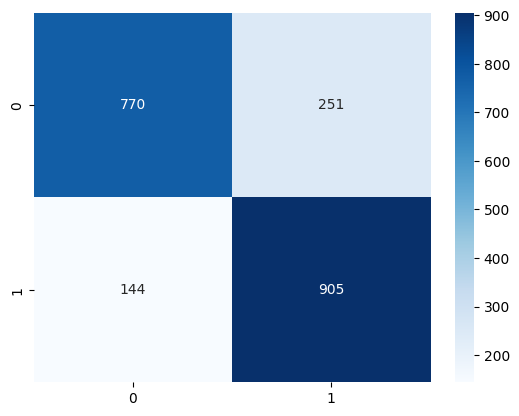

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Conclusion

## Model Results Summary

### Data Preprocessing:
- **Dataset**: Customer Churn Prediction dataset
- **Data Cleaning**: No null values found in the dataset
- **Feature Engineering**: Removed customerID column as it's not useful for prediction
- **Encoding**: Applied LabelEncoder for categorical variables
- **Scaling**: Applied MinMaxScaler for numerical features
- **Class Imbalance**: Used SMOTE (Synthetic Minority Over-sampling Technique) to balance the target variable

### Model Performance:
- **Algorithm**: Logistic Regression
- **Train-Test Split**: 80% training, 20% testing
- **Training Score**: 0.79 (79% accuracy)
- **Testing Score**: 0.80 (80% accuracy)

### Key Findings:
- The model shows consistent performance between training and testing sets, indicating no overfitting
- From the correlation analysis, Monthly Charges and Churn have a 0.19 correlation
- The confusion matrix and classification report show detailed performance metrics including precision, recall, and F1-score
- SMOTE balancing improved model performance by addressing class imbalance

### Conclusion:
The Logistic Regression model achieved 80% accuracy on the test set, which is a good baseline performance for customer churn prediction. The model generalizes well as evidenced by similar train and test scores. This model can be used to identify customers at risk of churning, allowing the business to take proactive retention measures.